# <center>Algoritmo Genético<center>

In [1]:
from random import randint,uniform,random
from tqdm import tqdm
import numpy as np

In [2]:
LIMITE_INFERIOR = 0
LIMITE_SUPERIOR = 10
SIZE_POP = 300
QTD_VAR = 2
QTD_GERACOES = 1000
TAXA_CRUZAMENTO = 0.70
TAXA_MUTACAO = 0.01
QTD_TROCA = 2 #qtd de posicoes a serem trocadas na mutação

In [3]:
def funcao_objetivo(x):
    return -(np.sqrt(x[0])*np.sin(x[0]))*(np.sqrt(x[1])*np.sin(x[1]))

In [4]:
def geraca_populacao():
    populacao = np.zeros((SIZE_POP,QTD_VAR))
    for individuo in range(SIZE_POP):
        for pos in range(QTD_VAR):
            populacao[individuo,pos] = uniform(LIMITE_INFERIOR, LIMITE_SUPERIOR)
    return populacao

In [5]:
def calcula_fo(pop):
    valor_fo = np.zeros(SIZE_POP)
    for individuo in range(SIZE_POP):
        valor_fo[individuo] = funcao_objetivo(pop[individuo,:])
    return valor_fo

In [6]:
def fitness(valor_fo):
    return valor_fo

In [7]:
def selecao(valor_fitness):
    pos = np.random.choice(range(SIZE_POP),  2 ,replace=False)
    valor = valor_fitness[pos[0]]<valor_fitness[pos[1]]
    if valor == True:
        return  pos[0]
    else: 
        return pos[1]

In [8]:
def cruzamento(pai1,pai2):
    x = random()
    filho1 = x*pai1+(1-x)*pai2
    filho2 = (1-x)*pai1+x*pai2
    return filho1,filho2

In [9]:
def mutacao(individuo):
    pos = np.random.choice(range(QTD_VAR),  QTD_TROCA ,replace=False)
    individuo[pos[0]] = individuo[pos[1]]
    individuo[pos[1]] = individuo[pos[0]]
    return individuo

In [10]:
import matplotlib.pyplot as plt

In [11]:
def main_ga():
    pop = geraca_populacao()
    fo = calcula_fo(pop)
    print(pop)
    fit = fitness(fo)
    melhor_fo = np.zeros(QTD_GERACOES)
    melhor_ind_geracao = np.zeros((QTD_GERACOES, QTD_VAR))
    for geracao in range(QTD_GERACOES):
        new_pop = np.empty((0, QTD_VAR))
        for i in range(round((SIZE_POP) / 2)):
            pai1 = 0
            pai2 = 0
            while pai1 == pai2:
                pai1 = selecao(fit)
                pai2 = selecao(fit)
            if random() < TAXA_CRUZAMENTO:
                filho1, filho2 = cruzamento(pop[pai1, :], pop[pai2, :]) 
                if random() < TAXA_MUTACAO:    
                    filho1 = mutacao(filho1)
                    filho2 = mutacao(filho2)  
                new_pop = np.vstack([new_pop, filho1, filho2])     
            else:
                pais = np.vstack([pop[pai1, :], pop[pai2, :]])
                new_pop = np.vstack([new_pop, pais])
        pop = new_pop    
        fo = calcula_fo(pop)
        fit = fitness(fo)
        min_fo = min(fo)
        melhor_fo[geracao] = min_fo
        pos_min_fo = np.where(fo == min_fo)

    
    plt.plot(melhor_fo)
    plt.xlim(0, QTD_GERACOES)
    plt.ylabel('Gerações')
    plt.ylabel('Melhor Custo')
    plt.title('Evolução da função objetivo - GA')
    plt.grid(True)
    plt.show()
    

    return pop[pos_min_fo,:][0,0]

[[5.28301699e+00 7.46732308e+00]
 [5.23686307e+00 4.51508482e+00]
 [4.56738930e+00 2.86014008e+00]
 [1.04596914e+00 8.81788419e+00]
 [5.16882587e+00 2.86959984e+00]
 [9.41506061e+00 9.35968921e+00]
 [3.17217607e+00 2.31565511e+00]
 [5.32591925e+00 4.90094815e+00]
 [1.11648958e+00 2.64280221e+00]
 [2.99103098e+00 9.41263612e+00]
 [1.51786791e+00 7.08986386e+00]
 [8.01198806e+00 3.16022838e+00]
 [2.55470556e+00 6.36921003e-01]
 [1.95147947e+00 6.57118662e+00]
 [1.02247754e+00 8.19263196e-01]
 [3.68443253e+00 3.53606575e-01]
 [1.63037416e+00 2.13335988e+00]
 [7.85067157e+00 8.87912019e+00]
 [8.39199479e+00 7.69269629e+00]
 [5.17120927e+00 3.39809228e+00]
 [7.63180574e+00 9.25518703e+00]
 [3.18738294e+00 3.43623451e+00]
 [5.98950431e-01 7.15879307e+00]
 [5.61252526e+00 6.85934055e+00]
 [3.94077055e+00 2.11509789e+00]
 [2.08953162e+00 3.44409588e+00]
 [3.84220442e+00 3.50229627e+00]
 [9.76308690e+00 2.16084369e+00]
 [3.16460135e-01 1.19061458e+00]
 [5.30859309e+00 6.46731488e+00]
 [7.671365

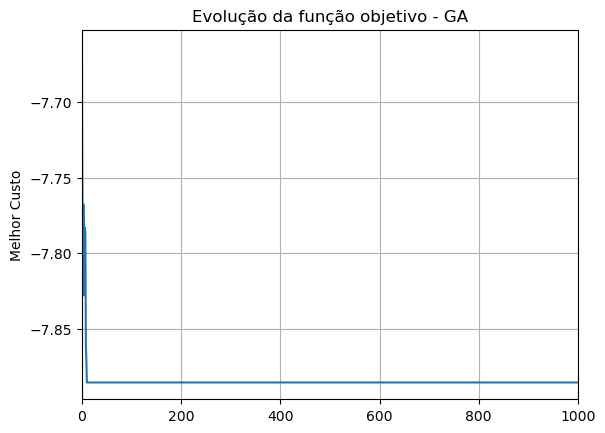

In [12]:
minimo = main_ga()

In [13]:
minimo

array([7.91705269, 7.91705269])